# Air Quality Index Prediction

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

## Reading The Dataset

In [2]:
df = pd.read_csv('Data/Data.csv')

df.sample(5)

,Date,PM 2.5,T,TM,Tm,SLP,H,PP,VV,V,VM
736,2016-12-09,283,18.2,27,7.7,1013.7,72,0,0.6,1.1,7.6
960,2015-09-03,150,31.4,36.5,27.6,1005.5,56,0.0,1.9,11.7,25.9
69,2020-08-13,46,26.8,29.0,25.0,996.6,97,68.07,1.9,5.9,13.0
1068,2014-12-19,336,11.7,17.6,7.4,1022.3,85,0,0.3,0.4,3.5
780,2016-09-02,97,30.7,34.0,25.5,1000.1,73,6.1,2.6,13.7,22.2


In [3]:
print("df.shape : ", df.shape)

df.shape :  (1074, 11)


<mark>**1074 enteries with 11 features, 1 target value (PM2.5)**</mark>

In [4]:
print(df.columns)

Index(['Date', 'PM 2.5', 'T', 'TM', 'Tm', 'SLP', 'H', 'PP', 'VV', 'V', 'VM'], dtype='object')


- **T**  	  Average Temperature (°C)            
- **TM**	  Maximum temperature (°C)             
- **Tm**	  Minimum temperature (°C)                 
- **SLP**	  Atmospheric pressure at sea level (hPa)          
- **H**	  Average relative humidity (%)           
- **PP**	  Total rainfall and / or snowmelt (mm)          
- **VV**    Average visibility (Km)           
- **V**	  Average wind speed (Km/h)               
- **VM**    Maximum sustained wind speed (Km/h)            

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1074 non-null   object
 1   PM 2.5  1074 non-null   int64 
 2   T       1074 non-null   object
 3   TM      1074 non-null   object
 4   Tm      1074 non-null   object
 5   SLP     1074 non-null   object
 6   H       1074 non-null   object
 7   PP      1074 non-null   object
 8   VV      1074 non-null   object
 9   V       1074 non-null   object
 10  VM      1074 non-null   object
dtypes: int64(1), object(10)
memory usage: 92.4+ KB


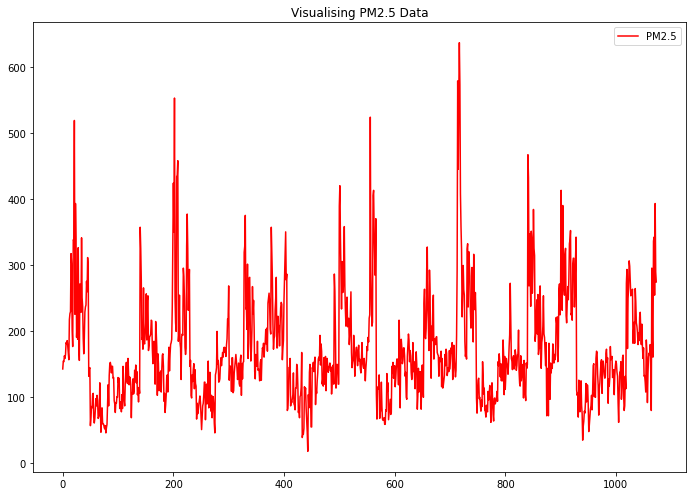

In [6]:
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

# Visualising the PM 2.5 Values

sns.lineplot(data = df["PM 2.5"], color="red", label="PM2.5")
plt.title('Visualising PM2.5 Data')
plt.show()

**Removing duplicate entries, if any**

In [7]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = df[df.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [Date, PM 2.5, T, TM, Tm, SLP, H, PP, VV, V, VM]
Index: []


In [8]:
def removespecialchar(x):
    if x=='-':
        return 0
    else:
        return x
    
df['T'] = df['T'].apply(lambda x: removespecialchar(x))
df['TM'] = df['TM'].apply(lambda x: removespecialchar(x))
df['Tm'] = df['Tm'].apply(lambda x: removespecialchar(x))
df['SLP'] = df['SLP'].apply(lambda x: removespecialchar(x))
df['H'] = df['H'].apply(lambda x: removespecialchar(x))
df['PP'] = df['PP'].apply(lambda x: removespecialchar(x))
df['VV'] = df['VV'].apply(lambda x: removespecialchar(x))
df['V'] = df['V'].apply(lambda x: removespecialchar(x))
df['VM'] = df['VM'].apply(lambda x: removespecialchar(x))

In [9]:
df[['PM 2.5','T','TM','Tm','SLP','H','PP','VV','V','VM']] = df[['PM 2.5','T','TM','Tm','SLP','H','PP','VV','V','VM']].astype('float')
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1074 non-null   datetime64[ns]
 1   PM 2.5  1074 non-null   float64       
 2   T       1074 non-null   float64       
 3   TM      1074 non-null   float64       
 4   Tm      1074 non-null   float64       
 5   SLP     1074 non-null   float64       
 6   H       1074 non-null   float64       
 7   PP      1074 non-null   float64       
 8   VV      1074 non-null   float64       
 9   V       1074 non-null   float64       
 10  VM      1074 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 92.4 KB


Now, all of the features are numerical.

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM 2.5,1074.0,168.955307,81.432880,17.0,116.000,153.00,198.75,637.00
T,1074.0,25.401304,8.209874,0.0,18.900,28.15,31.70,38.70
TM,1074.0,31.912477,8.192811,0.0,27.300,34.40,37.00,46.00
Tm,1074.0,18.936685,8.106726,0.0,11.600,20.80,26.00,34.00
SLP,1074.0,966.706425,200.034704,0.0,1000.425,1007.20,1014.70,1023.10
H,1074.0,62.473929,18.267143,0.0,53.000,65.00,75.00,99.00
PP,1074.0,1.463175,6.995556,0.0,0.000,0.00,0.00,99.06
VV,1074.0,2.164060,0.873431,0.0,1.600,2.30,2.70,5.80
V,1074.0,6.301583,3.700738,0.0,3.500,5.90,8.50,19.40
VM,1074.0,14.740968,7.598805,0.0,9.400,14.80,18.30,55.40


Replacing all the 0 values by their respective mean,

In [11]:
df['T'] = df['T'].replace(0,df['T'].mean())
df['TM'] = df['TM'].replace(0,df['TM'].mean())
df['Tm'] = df['Tm'].replace(0,df['Tm'].mean())
df['SLP'] = df['SLP'].replace(0,df['SLP'].mean())
df['H'] = df['H'].replace(0,df['H'].mean())
df['PP'] = df['PP'].replace(0,df['PP'].mean())
df['VV'] = df['VV'].replace(0,df['VV'].mean())
df['V'] = df['V'].replace(0,df['V'].mean())
df['VM'] = df['VM'].replace(0,df['VM'].mean())

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM 2.5,1074.0,168.955307,81.432880,17.000000,116.000000,153.000000,198.750000,637.00
T,1074.0,25.921628,7.341784,8.400000,19.625000,28.150000,31.700000,38.70
TM,1074.0,32.566177,6.768588,13.000000,28.000000,34.400000,37.000000,46.00
Tm,1074.0,19.342220,7.607086,2.400000,12.500000,20.800000,26.000000,34.00
SLP,1074.0,1006.310785,11.065508,966.706425,1000.425000,1007.200000,1014.700000,1023.10
H,1074.0,63.753656,15.875302,20.000000,54.250000,65.000000,75.000000,99.00
PP,1074.0,2.719271,6.746773,0.250000,1.463175,1.463175,1.463175,99.06
VV,1074.0,2.208389,0.815411,0.300000,1.800000,2.300000,2.700000,5.80
V,1074.0,6.454135,3.565101,0.200000,3.700000,6.100000,8.500000,19.40
VM,1074.0,15.152727,7.176124,1.900000,9.400000,14.800000,18.300000,55.40


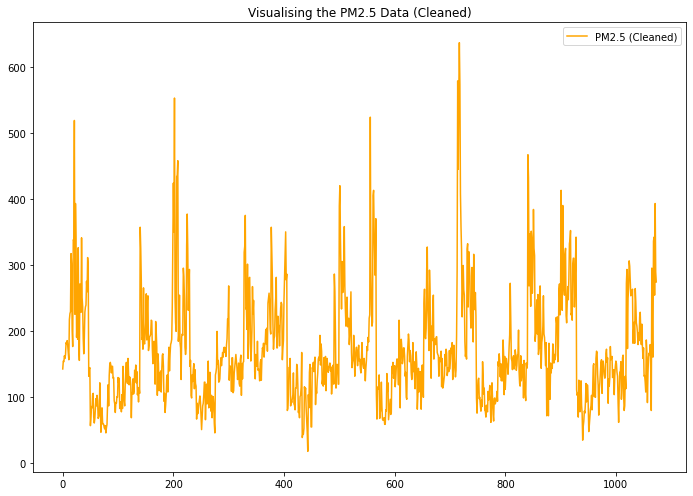

In [13]:
# Visualising the PM 2.5 Values

sns.lineplot(data = df["PM 2.5"], color="orange", label="PM2.5 (Cleaned)")
plt.title('Visualising the PM2.5 Data (Cleaned)')
plt.show()

## Exploratory Data Analysis (EDA)

- Fine particulate matter (PM2.5) is an air pollutant that is a concern for people's health when levels in air are high. PM2.5 are tiny particles in the air that reduce visibility and cause the air to appear hazy when levels are elevated.     
- Outdoor PM2.5 levels are most likely to be elevated on days with little or no wind or air mixing.

Creating a new binary feature `Acceptable`, its value will be **1** if the PM 2.5 lvl is acceptable and **0** if _not_.

In [14]:
pm_ = list(df['PM 2.5'])

Acceptable = []

for pm in pm_:
    if pm >= 151:
        Acceptable.append(0)
    else:
        Acceptable.append(1)

df['Acceptable'] = Acceptable

df.sample(3)

,Date,PM 2.5,T,TM,Tm,SLP,H,PP,VV,V,VM,Acceptable
311,2019-05-30,146.0,38.2,45.0,26.8,966.706425,26.0,1.463175,3.4,9.1,22.2,1
904,2015-11-13,390.0,22.3,29.3,16.1,1014.900000,64.0,1.463175,0.8,5.4,18.3,0
498,2018-06-26,119.0,32.4,42.7,30.7,995.500000,59.0,1.463175,1.9,5.4,11.1,1


0    558
1    516
Name: Acceptable, dtype: int64


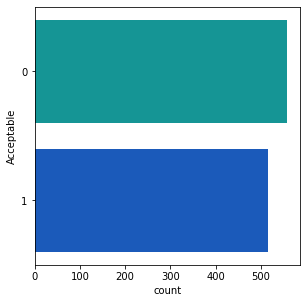

In [15]:
# figure size in inches
rcParams['figure.figsize'] = 4.75,4.75

print(df.Acceptable.value_counts())

sns.countplot(y = "Acceptable", data = df, palette = 'winter_r')
plt.show()

<mark>Out of the 1074 days, **558** days had `unacceptable` PM 2.5 Levels</mark>

**Plot to see the relation between different climatical features and Acceptable PM2.5 levels**

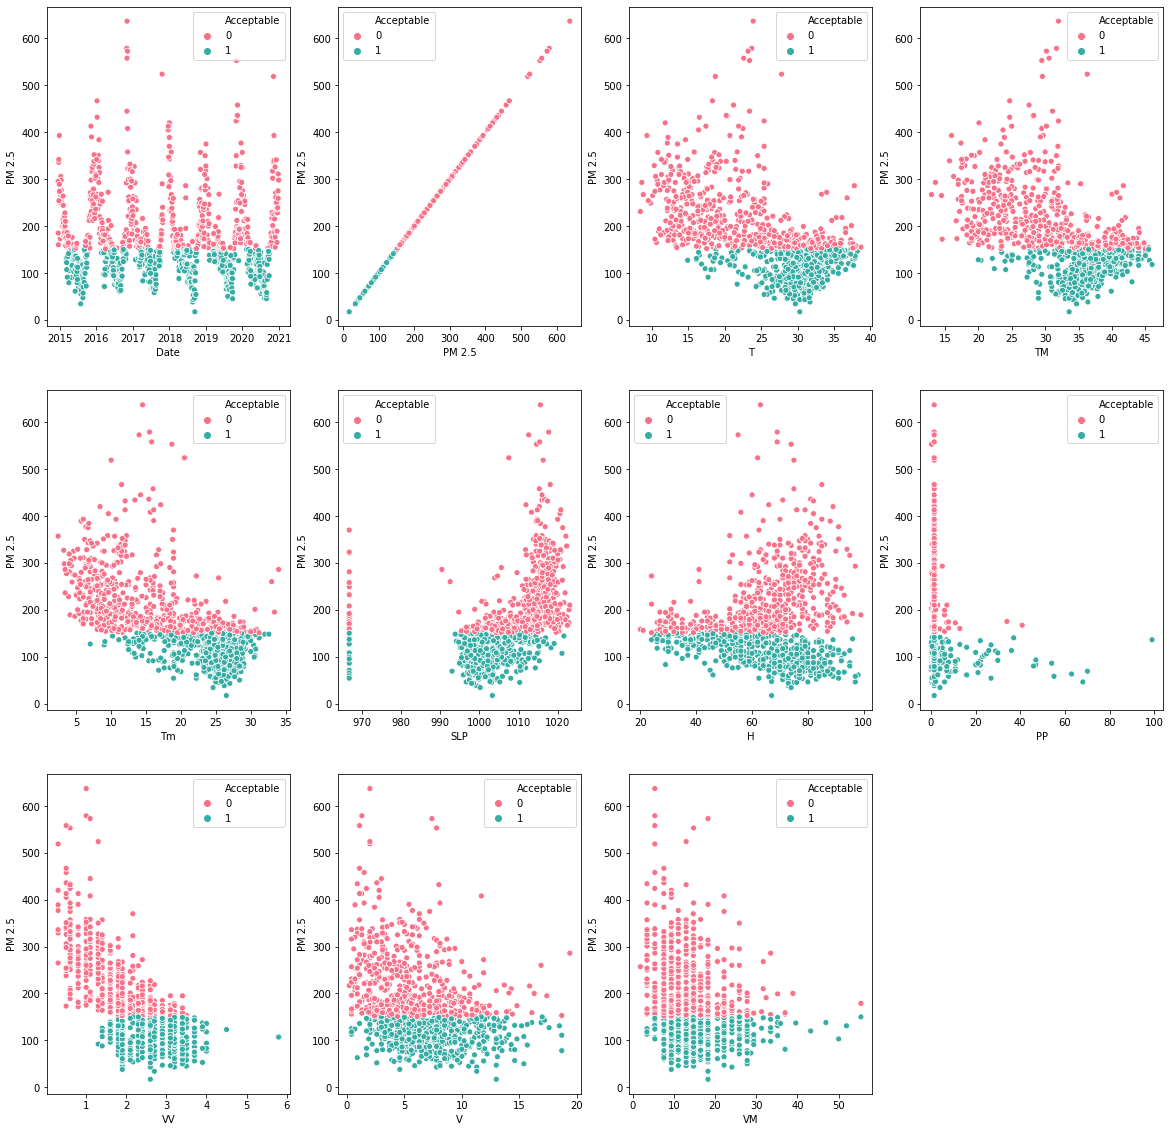

In [39]:
cols =  list(df.columns)

plt.figure(figsize=(20, 20))

for i in range(1, 12):
    plt.subplot(3, 4, i)
    sns.scatterplot(x = cols[i - 1], y = df['PM 2.5'],data = df, hue = "Acceptable", palette = "husl")

Except for `SLP`, not much was gained from this plot.  

- At higher SLP, the PM2.5 values tend to raise beyond the Acceptable level.

<mark>**Heatmap to see correlation between different features.**</mark>

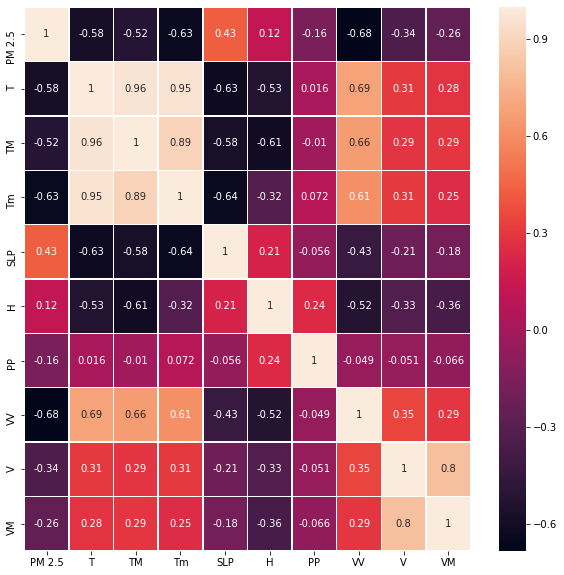

In [17]:
corrmat = df.corr()
top_corr_features = corrmat.index[:-1] # dropping 'Acceptable'

plt.figure(figsize=(10,10))

#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot = True, linewidths=.5)
# print(corrmat)
plt.show()

Once again we can see that _SLP_ is highly correlated with PM 2.5

## Prepairing Data for Model Preparation

In [18]:
from sklearn.model_selection import train_test_split

X = df[['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']]
y = df['PM 2.5']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.10, random_state = 42)

In [19]:
print('Length of X_train', len(X_train))
print('Length of X_val', len(X_val))
print('Length of y_train', len(y_train))
print('Length of y_val', len(y_val))

Length of X_train 966
Length of X_val 108
Length of y_train 966
Length of y_val 108


## Applying Machine Learning Algos :

##### We will be applying various Regression algos and then later deploy using the best model.

- Linear Regression
- Lasso Regression
- Decision Forest Regression

### Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

print("lr.score : ", lr.score(X_val, y_val))
print("lr.coef_ : ",lr.coef_)
print("lr.intercept_ : ",lr.intercept_)

lr.score :  0.6476420998751262
lr.coef_ :  [ 5.44305512e+00 -6.35279509e-01 -7.66172179e+00  1.08705847e-02
 -1.28264776e+00 -6.27069364e+01 -2.28633300e+00 -3.87495077e-01]
lr.intercept_ :  425.89376173799394


In [21]:
print("lr.score of training data: ", lr.score(X_train, y_train))

lr.score of training data:  0.6395997536164281


There seems to be overfitting as there is a 10% accuracy difference in train and validation set

In [22]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lr , X, y, cv = 5)

print(score)
print("Mean score : ",score.mean())

[0.6519258  0.70103779 0.54202007 0.57744463 0.57303107]
Mean score :  0.6090918734771464


### Lasso Regression

In [23]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(X_train, y_train)

print("lasso.score : ", lasso.score(X_val, y_val))
print("lasso.coef_ : ",lasso.coef_)
print("lasso.intercept_ : ",lasso.intercept_)

lasso.score :  0.6371747378774708
lasso.coef_ :  [ 3.37619373e+00  0.00000000e+00 -6.54032180e+00  1.33099761e-03
 -1.34928324e+00 -5.87044339e+01 -2.37487273e+00 -4.05380853e-01]
lasso.intercept_ :  442.88851691279956


In [24]:
print("lasso.score of training data: ", lasso.score(X_train, y_train))

lasso.score of training data:  0.6385171673229575


### Decision Forest Regression

In [25]:
from sklearn.ensemble import RandomForestRegressor

regr_rf = RandomForestRegressor(n_estimators=200, random_state=1234)
regr_rf.fit(X_train, y_train)

print("regr_rf.score : ", regr_rf.score(X_val, y_val))

regr_rf.score :  0.822886287613761


In [26]:
print("regr_rf.score of training data: ", regr_rf.score(X_train, y_train))

regr_rf.score of training data:  0.9534706069784349


#### Model Evaluation

In [27]:
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
T,5.443055
TM,-0.635280
Tm,-7.661722
SLP,0.010871
H,-1.282648
VV,-62.706936
V,-2.286333
VM,-0.387495


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in T is associated with an increase of 5.443055 in AQI PM 2.5 .
- Holding all other features fixed, a 1 unit increase in TM is associated with an decrease of 0.635280 in AQI PM 2.5 .
- Similarly for the rest of the features.

#### Evaluation Metrics

Three common evaluation metrics for regression problems:

- Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

- Mean Squared Error (MSE) is the mean of the squared errors, MSE "punishes" larger errors, which tends to be useful in the real world:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

- Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors, RMSE is interpretable in the "y" units:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [28]:
from sklearn import metrics

prediction = lr.predict(X_val)
lasso_pred = lasso.predict(X_val)
regr_rf_pred = regr_rf.predict(X_val)

print('Linear Regression')
print('MAE:', metrics.mean_absolute_error(y_val, prediction))
print('MSE:', metrics.mean_squared_error(y_val, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, prediction)))

print('\nLasso Regression')
print('MAE:', metrics.mean_absolute_error(y_val, lasso_pred))
print('MSE:', metrics.mean_squared_error(y_val, lasso_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, lasso_pred)))

print('\nDecision Forest Regression')
print('MAE:', metrics.mean_absolute_error(y_val, regr_rf_pred))
print('MSE:', metrics.mean_squared_error(y_val, regr_rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, regr_rf_pred)))

Linear Regression
MAE: 34.1216826673032
MSE: 2759.3447738434747
RMSE: 52.5294657677334

Lasso Regression
MAE: 34.39751688563837
MSE: 2841.3155785676554
RMSE: 53.3039921447508

Decision Forest Regression
MAE: 25.85959392472855
MSE: 1386.9925904195302
RMSE: 37.2423494213178


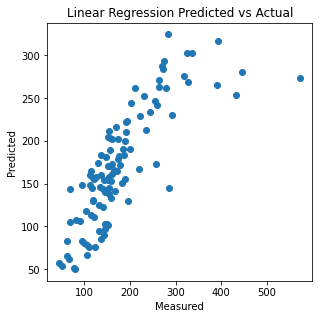

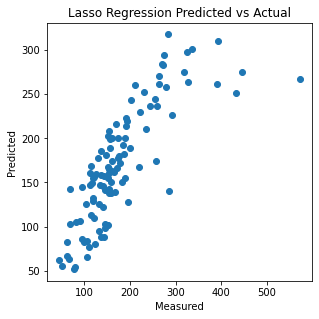

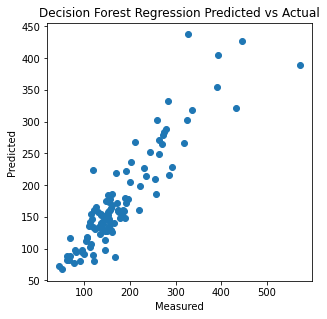

In [29]:
#linear
plt.scatter(y_val, prediction)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()

#lasso
plt.scatter(y_val, lasso_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Lasso Regression Predicted vs Actual')
plt.show()

#decision forest
plt.scatter(y_val, regr_rf_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Forest Regression Predicted vs Actual')
plt.show()

#### Saving the Models as pickle file

In [36]:
import pickle

lr_file = open('Models/linear_regression_model.pkl', 'wb')
pickle.dump(lr, lr_file)

In [37]:
lasso_file = open('Models/lasso_regression_model.pkl', 'wb')
pickle.dump(lasso, lasso_file)

In [38]:
rf_file = open('Models/decision_forest_regression_model.pkl', 'wb')
pickle.dump(regr_rf, rf_file)